# [AI Innovation Square 릴레이 온라인 특강: Python] 


## 8.객체지향 (4) - Descriptor
- 파이썬 HOWTO 참고

In [1]:
class A:
    def x(self):
        print('A')

In [2]:
class B(A):
    def x(self,x): #오버라이딩
        print(x)

In [8]:
b=B()
b.x(3)

3


연산자 오버로딩
- 모든 연산자 오버로딩 가능


In [3]:
class C:
    def __mul__(self,other): #연산자 오버로딩
        print(1)

In [4]:
c=C()

In [6]:
c*10

1


### with
- tensorflow에서 학습 시킬때 with 이용

In [206]:
%%writefile x.txt
writing file
asdfasdfasdf

Writing x.txt


- open:  file 열기
- close : 메모리에 올라오기 때문에 열고 닫아줘야함

- 특정 문맥과 상황 존재

In [10]:
f=open('x.txt') 

In [11]:
f.close()

### with
- context manager 
- `__enter__, __exit__` 정의 되어 있는 경우 with 사용 가능 

In [12]:
dir(f) #__enter__ , __exit__

['_CHUNK_SIZE',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_checkClosed',
 '_checkReadable',
 '_checkSeekable',
 '_checkWritable',
 '_finalizing',
 'buffer',
 'close',
 'closed',
 'detach',
 'encoding',
 'errors',
 'fileno',
 'flush',
 'isatty',
 'line_buffering',
 'mode',
 'name',
 'newlines',
 'read',
 'readable',
 'readline',
 'readlines',
 'reconfigure',
 'seek',
 'seekable',
 'tell',
 'truncate',
 'writable',
 'write',
 'write_through',
 'writelines']

In [14]:
import numpy as np
try:
    except Exception as e: #설명 보기용

In [ ]:
쟈소

In [ ]:
f=open('x.txt') #context

In [15]:
with open('x.txt') as g: #__enter__
    print('a')           #__exit__
    

a


In [16]:
set(dir(f))- set(dir(g)) #공집합 -> 의미 동일함

set()

In [19]:
import matplotlib.pyplot as plt

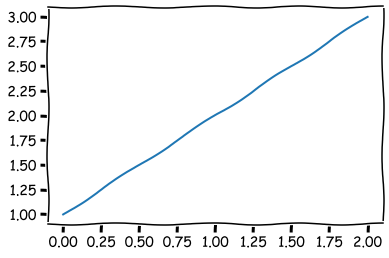

In [20]:
with plt.xkcd():
    plt.plot([1,2,3])

In [21]:
dir(plt.xkcd())#__enter__ , __exit__

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_orig']

In [25]:
import inspect
print(inspect.getsource(plt.xkcd().__enter__))

    def __enter__(self):
        return self



In [26]:
print(inspect.getsource(plt.xkcd().__exit__))

    def __exit__(self, *args):
        dict.update(rcParams, self._orig)



- with에 2개 이상으로 주어진 경우
    - eg.텐서플로우에서 두개 동시 학습 하는 경우 (GAN)

In [ ]:
with A( ) as a, B() as b:
    SUITE
    
with A() as a:
    with B() as b:
        SUITE

In [29]:
import tensorflow as tf

In [30]:
print(inspect.getsource(tf.GradientTape().__exit__))

  def __exit__(self, typ, value, traceback):
    """Exits the recording context, no further operations are traced."""
    if self._recording:
      self._pop_tape()



### Descriptor
- `.` 에대한 기능 관리
    - get,set, del 삼총사        
        - property 도 descriptor의 일종으로 기능을 바꿈
        - descriptor이용해서 재할당 못하도록 상수처럼 만듦

In [32]:
class X:
    pass

In [33]:
x=X()

In [34]:
x.a=1 #set

In [35]:
x.a   #get

1

In [37]:
del x.a #del 메모리 강제 제거
del(x.a)

In [38]:
x.a #사라짐

AttributeError: 'X' object has no attribute 'a'

- python은 garbage collection,  소멸자 제거
    - java에서는 garbage collection으로 제거
    - C++ 소멸자    

In [39]:
import gc

In [74]:
class DS:
    def __init__(self):
        self.x=3
    def __get__(self,obj,x): #non-data descriptor 데이터 변형 없음
        print('__get__')
        return self.x    

In [76]:
class E:
    d=DS()

In [77]:
E.d #__get__ 실행ㄸ

__get__


3

In [78]:
ee=E()
ee.d #인스턴스에 없어 클래스의 d 부름 ->__get__

__get__


3

In [79]:
ee.d=100
ee.d

100

정확히 일치시켜야함

In [81]:
class DS: #descriptor protocal
    def __init__(self):
        self.x=3
    def __get__(self,obj,x): #non-data descriptor 데이터 변형 없음
        print('__get__')
        return self.x    
    def __set__(self,obj,a):
        print('__set__')        
        raise AttributeError('값 변경 못함')
        
class E:
    d=DS()        #composition

In [82]:
E.d

__get__


3

In [83]:
E.d=5

E.d

5

In [57]:
class DS:
    def __init__(self,x):
        self.x=x
    def __get__(self,instance,owner):
        print('__get__')
        return self.x
    def __set__(self,instance, x):
        print('__set__')
        self.x=x
    def __delete__(self,instance):
        print('__delete__')
        del self.x

- class 변수로 정의
-  인스턴스 변수에 없으면 클래스 변수 반환

In [58]:
class DSS:
    x=DS(3) #compositio

In [59]:
DSS.x=5

In [60]:
DSS.x

5

In [50]:
y=DSS()

In [51]:
y.x=9

In [52]:
y.x

9

In [53]:
class DSS:
    def __init__(self,x):
        self.x=DS(x) #composition

In [54]:
t=DSS(2)

In [55]:
t.x=3

In [56]:
t.x

3

### mangling
- `__*`
- descriptor와 사용하면 private 처럼 사용해서 정보 은닉

In [62]:
class DS:
    def __init__(self,x):
        self.__x=x  #mangling
    def __get__(self,instance,owner):
        print('__get__')
        return self.__x
    def __set__(self,instance, x):
        print('__set__')
        self.__x=x
    def __delete__(self,instance):
        print('__delete__')
        del self.__x

In [64]:
class DSS:
    x=DS(4)  #__x가 행동

In [65]:
DSS.x

__get__


4

In [66]:
class DS:
    def __init__(self,x):
        self.__x=x  #mangling
    def __get__(self,instance,owner):
        print('__get__')
        return self.__x
    def __set__(self,instance, x):
        print('__set__')
        self.__x=x

In [67]:
class DSS:
    x=DS(4)  # 클래스 변수 

In [68]:
DSS.x

__get__


4

In [69]:
DSS.x=5

In [71]:
y=DSS()
y.x  #인스턴스 변수로 사용하면 안되기 때문

5

In [73]:
y.x=9 #새로운 인스턴스 변수 생겨서 더이상 부르지 못함
y.x

9

### property
- property(fget=None, fset=None, fdel=None, doc=None)
만드는 방법 3가지 

In [105]:
class DS2:
    def __init__(self,x):
        self.x=x
    def getx(self):
        print('get')
        return self.x
    def setx(self,y):
        print('set')
        self.x=y
    def delx(self):
        print('del')
        
    xx= property(getx,setx,delx)

In [106]:
t=DS2(4)

In [107]:
del t.xx

del


In [108]:
t.xx

get


4

In [109]:
t.xx=6

set


상수로 만들기
- descriptor 이용해서 set 기능 바꾸어 재 할당 막음

In [110]:
class DS2:
    def __init__(self,x):
        self.x=x
    def getx(self):
        print('get')
        return self.x
    def setx(self,y):
        print('set')
        raise AttributeError('할당 불가')
    def delx(self):
        print('del')
        
    xx= property(getx,setx,delx)

In [111]:
t=DS2(4)
t.xx=6  

set


AttributeError: 할당 불가

In [112]:
import tensorflow as tf

In [115]:
a= tf.constant([1,2,3])

In [116]:
b=tf.Variable([1,2,3,])

In [117]:
a.assign([4,5,5]) #상수에 재할당 불가

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

가장 많이 사용 하는 방법
- python에서는 메소드 오버로딩 지원하지 않음

In [143]:
class DS3:
    def __init__(self,x):
        self.__x=x
    @property
    def x(self):
        print('get')
        return self.__X
    @x.setter        #동일한 이름으로 지정
    def x(self,y):   
        print('set')
        self.__x=y
    @x.deleter
    def x(self):
        print('Del')

In [148]:
t=DS3(4)
t.x

get


AttributeError: 'DS3' object has no attribute '_DS3__X'

In [149]:
t.x=6

set


In [150]:
t.xx=5

In [151]:
del t.x

Del


### singledispatch
- 인자가 1개인 generic function
- python 에서는 singledispatch만 지원

In [152]:
from functools import singledispatch #functional paradigm 관련

In [153]:
len({1,2,3})

3

In [155]:
@singledispatch
def x(a):
    print('x',a)
@x.register(int)
def _x(a):       
    print('int')
@x.register(str)
def _x(a):
    print('str')

In [156]:
x(3)

int


In [157]:
x('삼')

str


In [158]:
from dataclasses import dataclass

In [ ]:
- C 언어처럼 타입 할당 

In [165]:
@dataclass
class X:
    a:int
    b:str
    c:int=0

In [166]:
X.c 

0

---
## 함수형 패러다임
> python 멀티 패러다임 언어
- 수학함수로 제약을 둠 
    - **형식적 증명 가능성**: 이론과의 간극을 줄
    - 모듈성
    - 결합성
    - 디버깅, 테스트 용이
함수형 프로그래밍 HOWTO: https://docs.python.org/ko/3/howto/functional.html
##### side-effect
-  입출력 외의 기타 다른값

In [167]:
def x():  #입력이 없어 함수 아님
    return 1

In [169]:
def y(a):
    print('3') #side effect
    return None

In [ ]:
a=input()
b=int(a)
int(input()) #합성함수 

Higher order function
- 함수안에 함수 인자 받거나 리턴으로 받음
First class function


### iterator
- 함수형 패러다임은 한꺼번에 여러개 값을 처리하는데에 관심이 있음
- 내부적으로는 input 하나식 처리하여 한번에 출력
    - for in: iterable
#### iterable
- iterator가 될 수 있는(-able) : 한 개씩 뽑을 수 있음
    - collection
- __iter__ 정의

In [171]:
a=[1,2,3]

- ducktiyping
- collections.abc의 Iterable 재정의

In [172]:
dir(a)#__iter__ -> iterable

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

- indexing, slicing하면 메모리에 전체 올리게 됨
- 빅데이터에서는 비효율적

In [173]:
for i in a:
    print(i)

1
2
3


In [ ]:
sum #iterable 인자로 받음
all
any
enumerate
map

In [174]:
b=iter(a) #함수

In [ ]:
a

In [177]:
b=iter(a)
b

In [176]:
type(iter)

builtin_function_or_method

### \_\_next__
- iterator에 존재
- Lazy 기법 메모리상에 전체 올리지 않고 next하는 경우에만 올라가 메모리 관리 효율적
    - <> eager

In [178]:
dir(b) #__next__

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__length_hint__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [179]:
next(b)

1

In [180]:
list(b)

[2, 3]

In [181]:
b=iter(a)
next(b)

1

In [182]:
next(b)

2

In [183]:
next(b)

3

In [184]:
next(b) #StopIteration

StopIteration: 

- indexing, slciing 불가

In [185]:
 b[0]

TypeError: 'list_iterator' object is not subscriptable

- 상황에 따라서 indexing, iter 사용할지 선택

In [186]:
b=frozenset([1,2,3])

In [187]:
dir(b) #__iter__

['__and__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__or__',
 '__rand__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__ror__',
 '__rsub__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__xor__',
 'copy',
 'difference',
 'intersection',
 'isdisjoint',
 'issubset',
 'issuperset',
 'symmetric_difference',
 'union']

In [191]:
c=iter(b)# 메모리 번지알려줌
c

- __iter__ 없는 경우 generator 통해 만듦

In [192]:
def x():
    return 1
x

<function __main__.x()>

In [195]:
e=enumerate([1,2,3]) #next
e

In [196]:
dir(e)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [197]:
next(e)

(0, 1)

In [198]:
for i in 1,2,3:
    print(i)

1
2
3


In [200]:
b=iter([1,2,3])
list(b)

[1, 2, 3]

In [201]:
list('abcd') #iterable

['a', 'b', 'c', 'd']

In [202]:
dir(b)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__length_hint__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [203]:
b=iter([1,2,3])
list(b)

[1, 2, 3]

In [204]:
next(b)

StopIteration: 

In [207]:
with open('x.txt') as f:
    print(dir(f))

['_CHUNK_SIZE', '__class__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '_checkClosed', '_checkReadable', '_checkSeekable', '_checkWritable', '_finalizing', 'buffer', 'close', 'closed', 'detach', 'encoding', 'errors', 'fileno', 'flush', 'isatty', 'line_buffering', 'mode', 'name', 'newlines', 'read', 'readable', 'readline', 'readlines', 'reconfigure', 'seek', 'seekable', 'tell', 'truncate', 'writable', 'write', 'write_through', 'writelines']


In [208]:
f=open('x.txt')

In [209]:
dir(f)

['_CHUNK_SIZE',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_checkClosed',
 '_checkReadable',
 '_checkSeekable',
 '_checkWritable',
 '_finalizing',
 'buffer',
 'close',
 'closed',
 'detach',
 'encoding',
 'errors',
 'fileno',
 'flush',
 'isatty',
 'line_buffering',
 'mode',
 'name',
 'newlines',
 'read',
 'readable',
 'readline',
 'readlines',
 'reconfigure',
 'seek',
 'seekable',
 'tell',
 'truncate',
 'writable',
 'write',
 'write_through',
 'writelines']

In [210]:
next(f) #파일을 한 줄 씩 가져옴

'writing file\n'

### comprehension
- comp
    - 함수형 언어 haskel에서 가져옴
    - lisp(list programming) : 데이터 동시 처리
- 한 번에 값을 새로 생성/변경하는 용도
- 간결하고 빠르게 처리

In [212]:
a=[x for x in [1,2,3]]
a

[1, 2, 3]

In [211]:
a=[x for x in range(10)]
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [213]:
a=[x for x in range(10) if x%2==0] #짝수 데이터
a

[0, 2, 4, 6, 8]

In [215]:
a=[x if x%2==0 else '' for x in range(10)]
a #홀수 데이터 ''로 바꾸기

[0, '', 2, '', 4, '', 6, '', 8, '']

In [220]:
a=[(x,y) for x in ['a','b'] for y in range(5)] #중첩
a

[('a', 0),
 ('a', 1),
 ('a', 2),
 ('a', 3),
 ('a', 4),
 ('b', 0),
 ('b', 1),
 ('b', 2),
 ('b', 3),
 ('b', 4)]

In [222]:
[x*x for x in [1,2,3,4]] #제곱으로 변경

[1, 4, 9, 16]

In [227]:
temp=[]
for i in [1,2,3,4]:
    temp.append(i*i)

In [228]:
temp

[1, 4, 9, 16]

In [229]:
%timeit [x for x in range(1000)]

69.6 µs ± 4.98 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [230]:
%%timeit
temp=[]
for i in range(1000):
    temp.append(i*i)

313 µs ± 65.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [231]:
sum([x for x in range(10)]) 

45

- 식을 유연하게 사용

- set, list, dict comprehension

In [232]:
{x for x in range(10)} #set comp

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [233]:
[x for x in range(10)] #list comp

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [234]:
{x:x for x in range(10)} #dict comp

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}

tuple 은  generator

In [235]:
(x for x in range(10)) #generator

<generator object <genexpr> at 0x7fea0580b2d0>